In [1]:
import os
import random
from shutil import copyfile

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

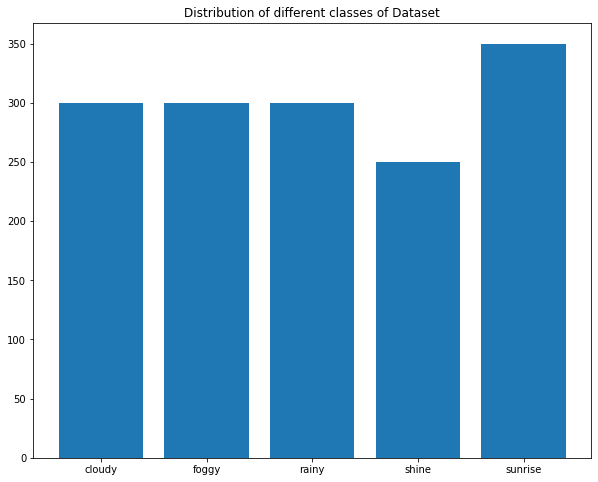

In [4]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../dataset/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

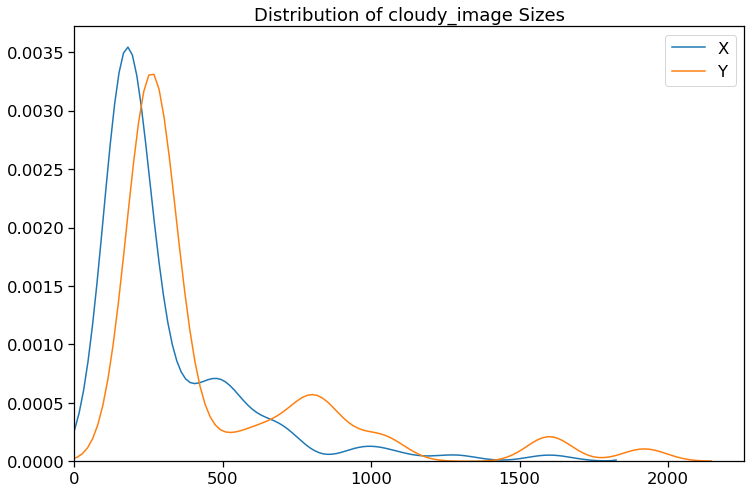

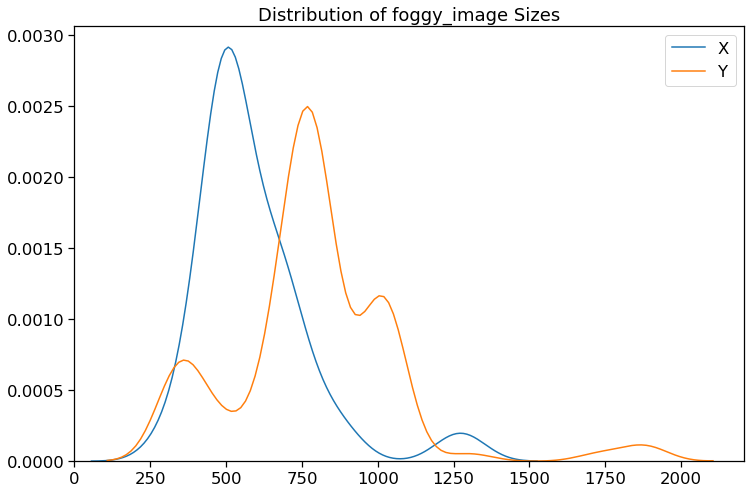

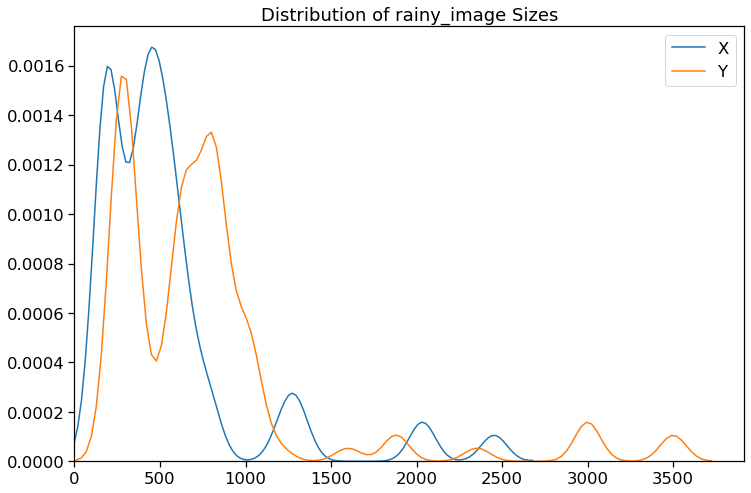

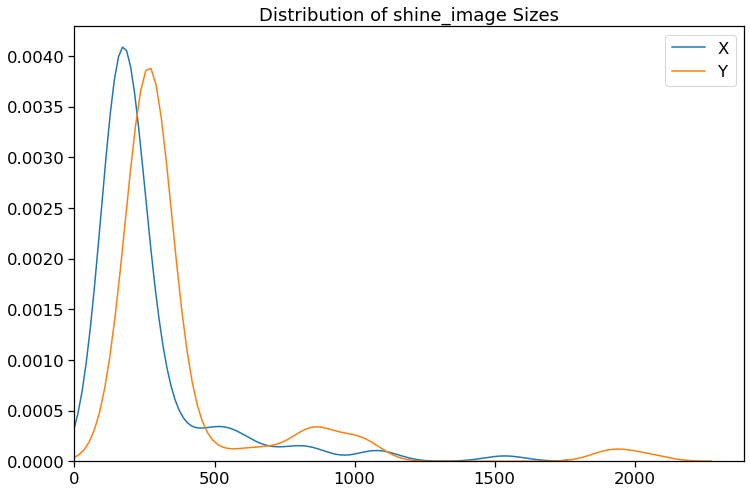

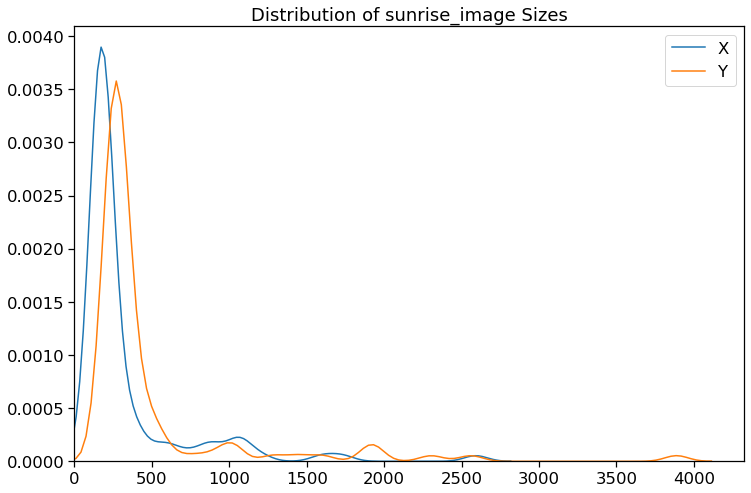

In [5]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

for i in image_folder:
    sample_images = list(pathlib.Path('../dataset/'+i+'/').rglob('*/'))
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {}_image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

In [ ]:
try:
    os.mkdir('../weather_pred/Data')
    os.mkdir('../weather_pred/Data/training')
    os.mkdir('..weather_pred/Data/validation')
    os.mkdir('../weather_pred/Data/training/cloudy')
    os.mkdir('../weather_pred/Data/training/foggy')
    os.mkdir('../weather_pred/Data/training/rainy')
    os.mkdir('../weather_pred/Data/training/shine')
    os.mkdir('../weather_pred/Data/training/sunrise')
    os.mkdir('../weather_pred/Data/validation/cloudy')
    os.mkdir('../weather_pred/Data/validation/foggy')
    os.mkdir('../weather_pred/Data/validation/rainy')
    os.mkdir('../weather_pred/Data/validation/shine')
    os.mkdir('../weather_pred/Data/validation/sunrise')
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CLOUDY_SOURCE_DIR = '.../dataset/cloudy/'
TRAINING_CLOUDY_DIR = '.../weather_pred/Data/training/cloudy/'
VALID_CLOUDY_DIR = '.../weather_pred/Data/validation/cloudy/'

FOGGY_SOURCE_DIR = '.../dataset/foggy/'
TRAINING_FOGGY_DIR = '../weather_pred/Data/training/foggy/'
VALID_FOGGY_DIR = '.../weather_pred/Data/validation/foggy/'

RAINY_SOURCE_DIR = '.../dataset/rainy/'
TRAINING_RAINY_DIR = '.../weather_pred/Data/training/rainy/'
VALID_RAINY_DIR = '.../weather_pred/Data/validation/rainy/'

SHINE_SOURCE_DIR = '.../dataset/shine/'
TRAINING_SHINE_DIR = '.../weather_pred/Data/training/shine/'
VALID_SHINE_DIR = '.../weather_pred/Data/validation/shine/'

SUNRISE_SOURCE_DIR = '.../dataset/sunrise/'
TRAINING_SUNRISE_DIR = '.../weather_pred/Data/training/sunrise/'
VALID_SUNRISE_DIR = '.../weather_pred/Data/validation/sunrise/'

In [ ]:
split_size = .85

In [ ]:
split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

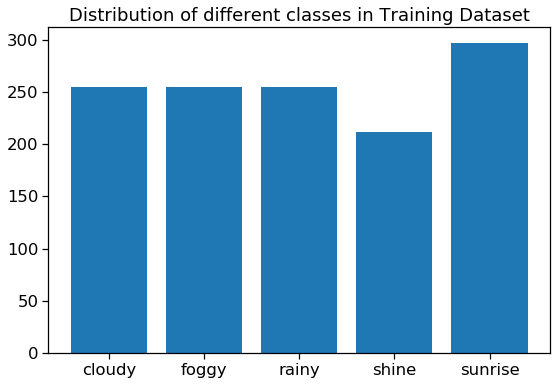

In [6]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../weather_pred/Data/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [7]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('../weather_pred/Data/training/'+i+'/')))) 

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


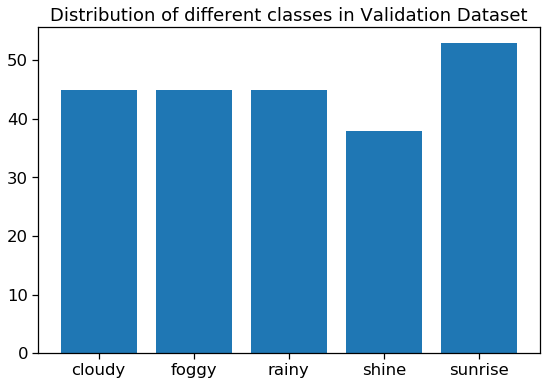

In [8]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('../weather_pred/Data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [9]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('../weather_pred/Data/validation/'+i+'/')))) 

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53
